# Results for various social networks with synthetic parameters

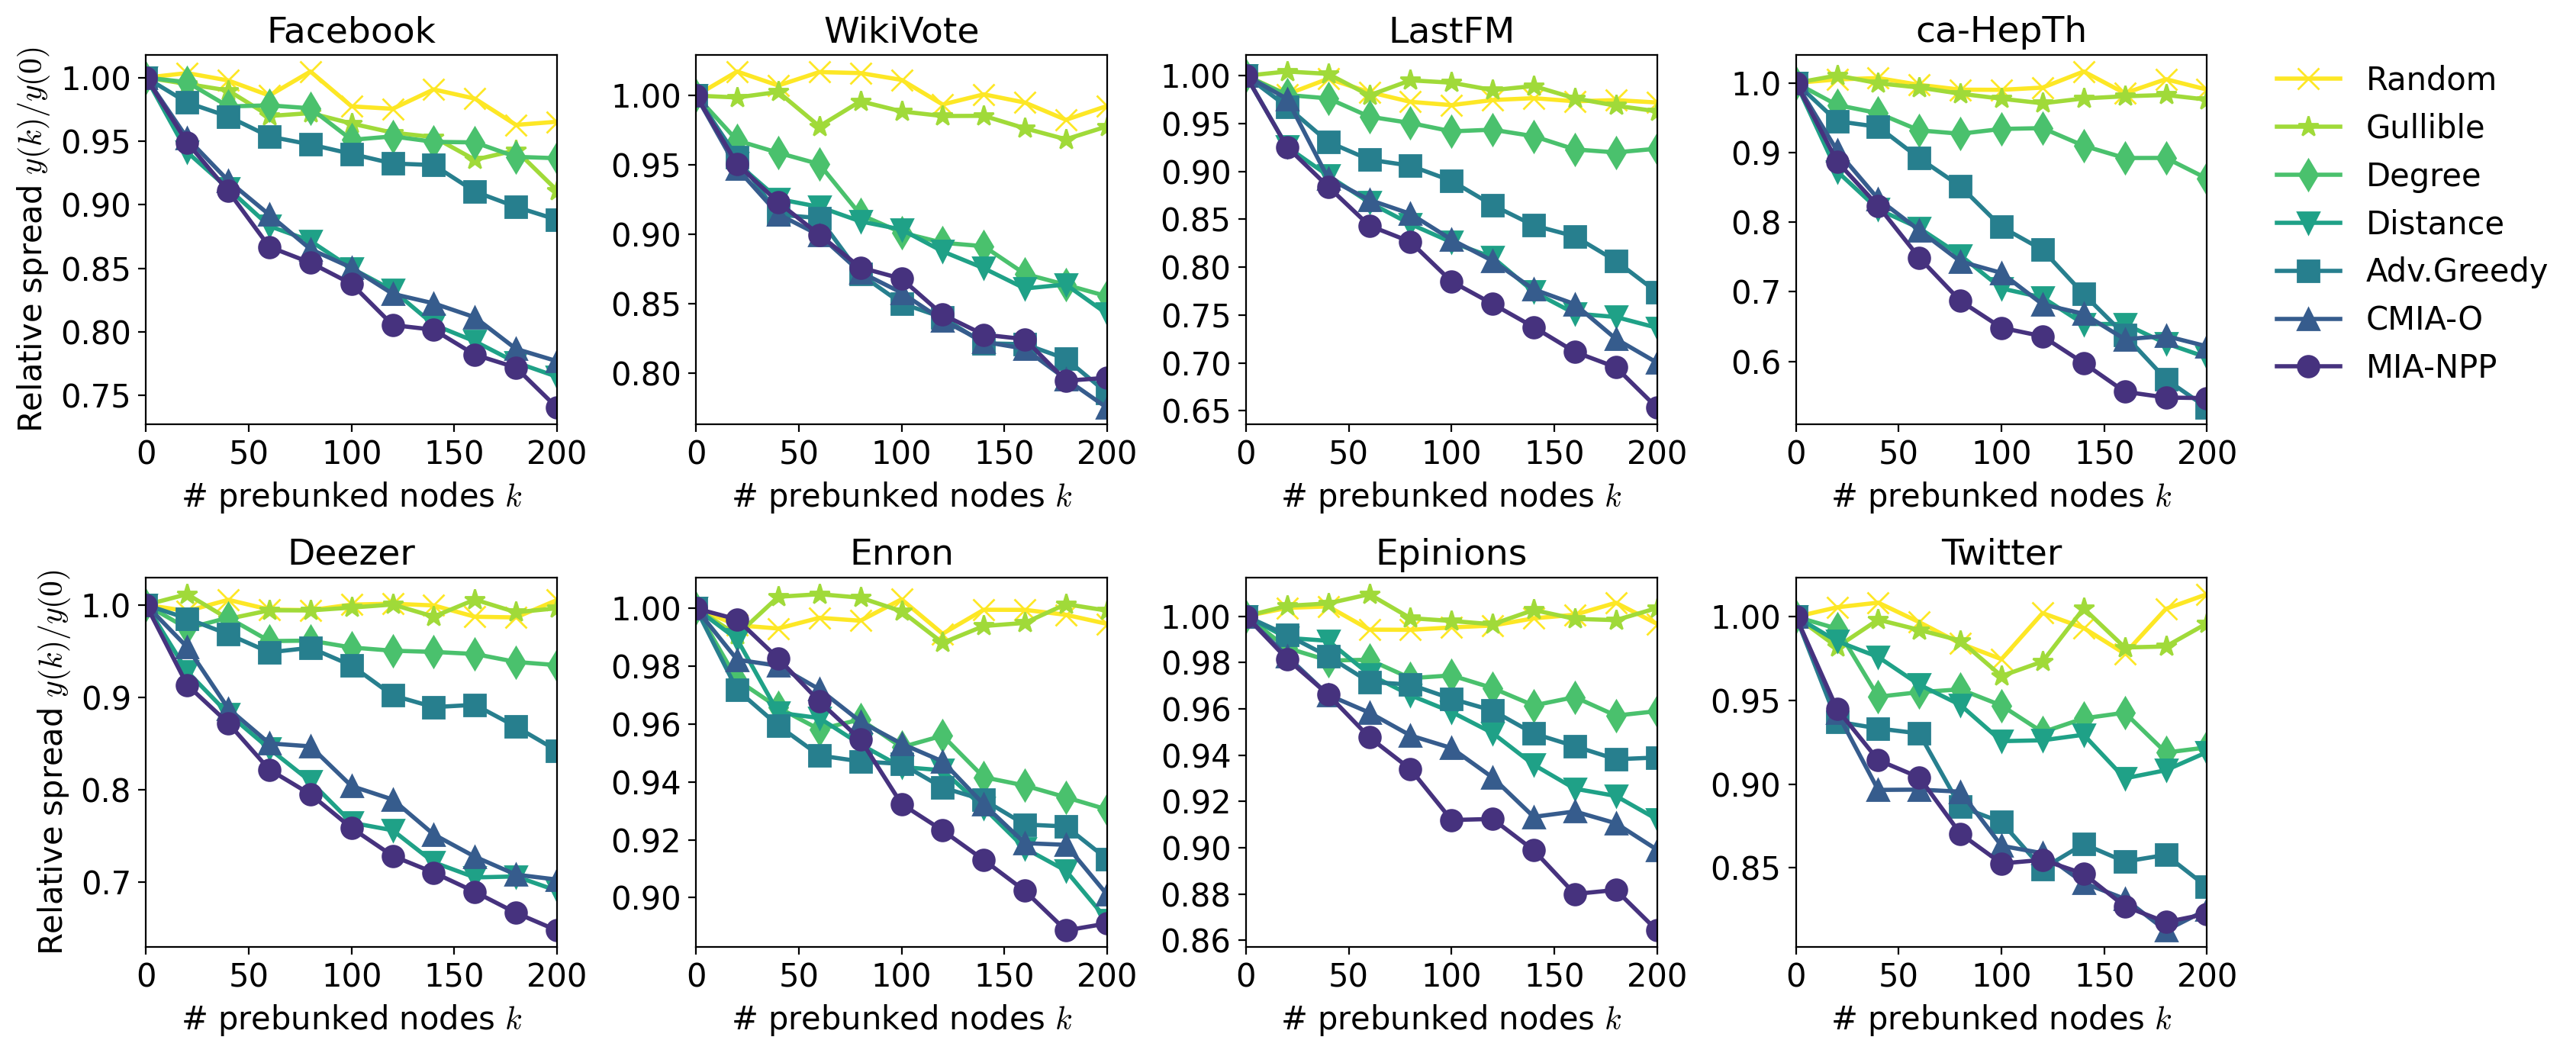

In [948]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['savefig.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'

def plot_simulation_results_synthetic(graph_names, num_row, num_col, kmax):
    n = len(graph_names)
    
    step = kmax//20
    xaxis = np.arange(0, kmax + step, step)
    
    plt.rcParams["mathtext.fontset"] = 'cm'
    fmts = ['o-', '^-', 's-', 'v-', 'd-', '*-', 'x-']
    alg_names = ['MIA-NPP', 'CMIA-O', 'AdvancedGreedy', 'Distance', 'Degree', 'Gullible', 'Random']
    alg_labels = ['MIA-NPP', 'CMIA-O', 'Adv.Greedy', 'Distance', 'Degree', 'Gullible', 'Random']
    num_alg = len(alg_names) 
    cmap = plt.get_cmap('viridis')
    colors = [cmap((a+1)/(num_alg)) for a in range(num_alg)]

    num_nodes = {'Facebook':4039, 'WikiVote':7066, 'LastFM':7624, 'ca-HepTh':8638, 'Deezer':28281, 'Enron':33696, 'Epinions':75877, 'Twitter':81306}
    
    fig = plt.figure(figsize=(17,7), dpi=200)
    for i in range(n):
        plt.subplot(num_col, num_row, i+1)
        y0 = None
        for a in range(num_alg-1, -1, -1):
            alg_name = alg_names[a]
            path = 'results_synthetic/'+graph_names[i]+'/'+alg_name+'_sim_results.npy'
            if os.path.exists(path):
                y = np.load(path, allow_pickle=True)
                # plt.plot(xaxis, y/y[0], fmts[a], markersize=7, label=alg_labels[a], color=colors[a], lw=2)
                plt.plot(xaxis[::2], (y/y[0])[::2], fmts[a], markersize=10, label=alg_labels[a], color=colors[a], lw=2)
        #################################
        plt.xticks([0, 50, 100, 150, 200], [0, 50, 100, 150, 200], fontsize=15)
        plt.yticks(fontsize=15)
        ymax = list(plt.ylim())[1]
        ymin = list(plt.ylim())[0]
        yscale = ymax - ymin
        plt.xlim((0, kmax))
        plt.ylim((ymin, ymax))
        plt.title(graph_names[i], fontsize=17)
        if i == 0 or i == 4:
            plt.ylabel(r'Relative spread $y(k)/y(0)$', fontsize=15)
        plt.xlabel(r'# prebunked nodes $k$', fontsize=15)
        # plt.legend(fontsize=14, frameon=False)
        if i == 3:
            plt.legend(fontsize=15, frameon=False, bbox_to_anchor=(1.1, 1.05), loc='upper left')
    plt.tight_layout()
    plt.show()

graph_names = ['Facebook', 'WikiVote', 'LastFM', 'ca-HepTh', 'Deezer', 'Enron', 'Epinions', 'Twitter']
plot_simulation_results_synthetic(graph_names, num_row=4, num_col=2, kmax=200)


# Results for politifact & gossipcop network

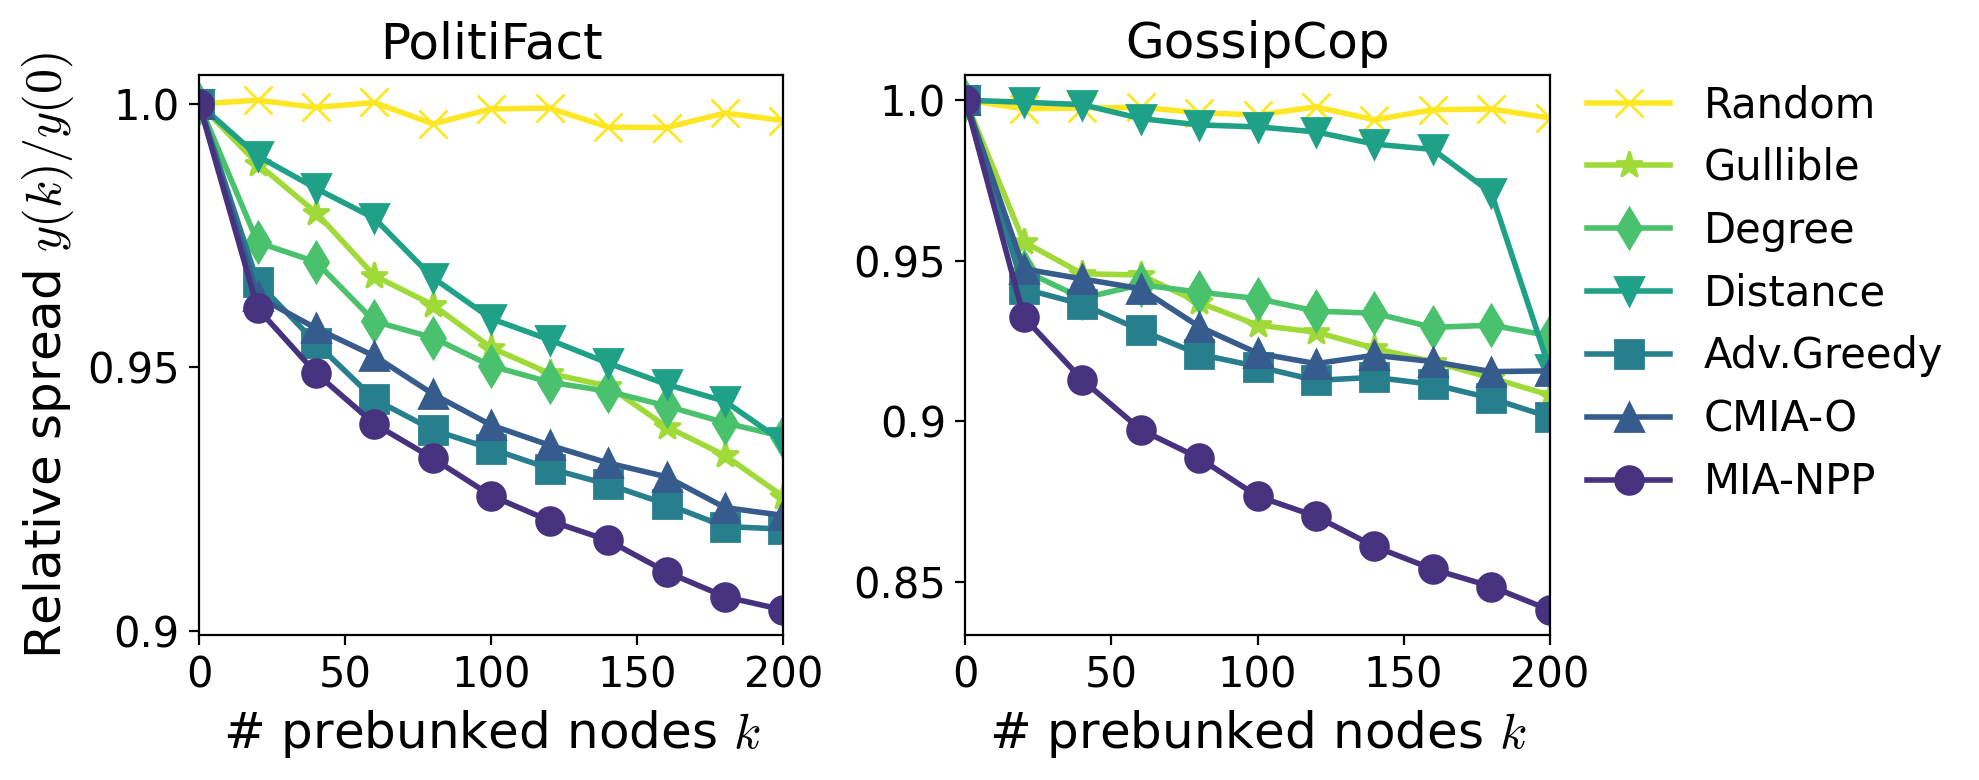

In [945]:

def plot_all_simulation_results_real(graph_names, num_row, num_col, kmax):
    n = len(graph_names)
    
    step = kmax//20
    xaxis = np.arange(0, kmax + step, step)
    
    plt.rcParams["mathtext.fontset"] = 'cm'
    fmts = ['o-', '^-', 's-', 'v-', 'd-', '*-', 'x-']
    alg_names = ['MIA-NPP', 'CMIA-O', 'AdvancedGreedy', 'Distance', 'Degree', 'Gullible', 'Random']
    alg_labels = ['MIA-NPP', 'CMIA-O', 'Adv.Greedy', 'Distance', 'Degree', 'Gullible', 'Random']
    # alg_names = ['MIA-NPP', 'Degree', 'Gullible', 'Random']
    # alg_labels = alg_names
    num_alg = len(alg_names)
    cmap = plt.get_cmap('viridis')
    colors = [cmap((a+1)/(num_alg)) for a in range(num_alg)]
    
    fig = plt.figure(figsize=(10,4), dpi=200)
    for i in range(n):
        plt.subplot(num_row, num_col, i+1)
        for a in range(num_alg-1, -1, -1):
            alg_name = alg_names[a]
            path = 'results_real/'+graph_names[i]+'/'+alg_name+'_sim_results.npy'
            if os.path.exists(path):
                y = np.load(path, allow_pickle=True)
                # plt.plot(xaxis, y/y[0], fmts[a], markersize=7, label=alg_labels[a], color=colors[a], lw=2)
                plt.plot(xaxis[::2], (y/y[0])[::2], fmts[a], markersize=10, label=alg_labels[a], color=colors[a], lw=2)
        ymax = list(plt.ylim())[1]
        ymin = list(plt.ylim())[0]
        yscale = ymax - ymin
        plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=15)
        plt.xticks([0, 50, 100, 150, 200], [0, 50, 100, 150, 200], fontsize=15)
        plt.xlim((0, kmax))
        # plt.ylim((ymin - yscale * 0.1, ymax))
        # plt.ylim((0.8, 1.01))
        plt.ylim((ymin, ymax))
        if graph_names[i] == 'politifact':
            plt.title('PolitiFact', fontsize=18)
        else:
            plt.title('GossipCop', fontsize=18)
        if i == 0:
            plt.ylabel(r'Relative spread $y(k)/y(0)$', fontsize=18)
            # plt.ylabel('CSR', fontsize=18)
        plt.xlabel(r'# prebunked nodes $k$', fontsize=18)
        if i == 1:
            plt.legend(fontsize=15, frameon=False, bbox_to_anchor=(1.0, 1.05), loc='upper left')
        # plt.legend(fontsize=12, frameon=False)
    plt.tight_layout()
    plt.show()


graph_names = ['politifact', 'gossipcop']
plot_all_simulation_results_real(graph_names, num_row=1, num_col=2, kmax=200)

# Maps of Prebunking targets

politifact


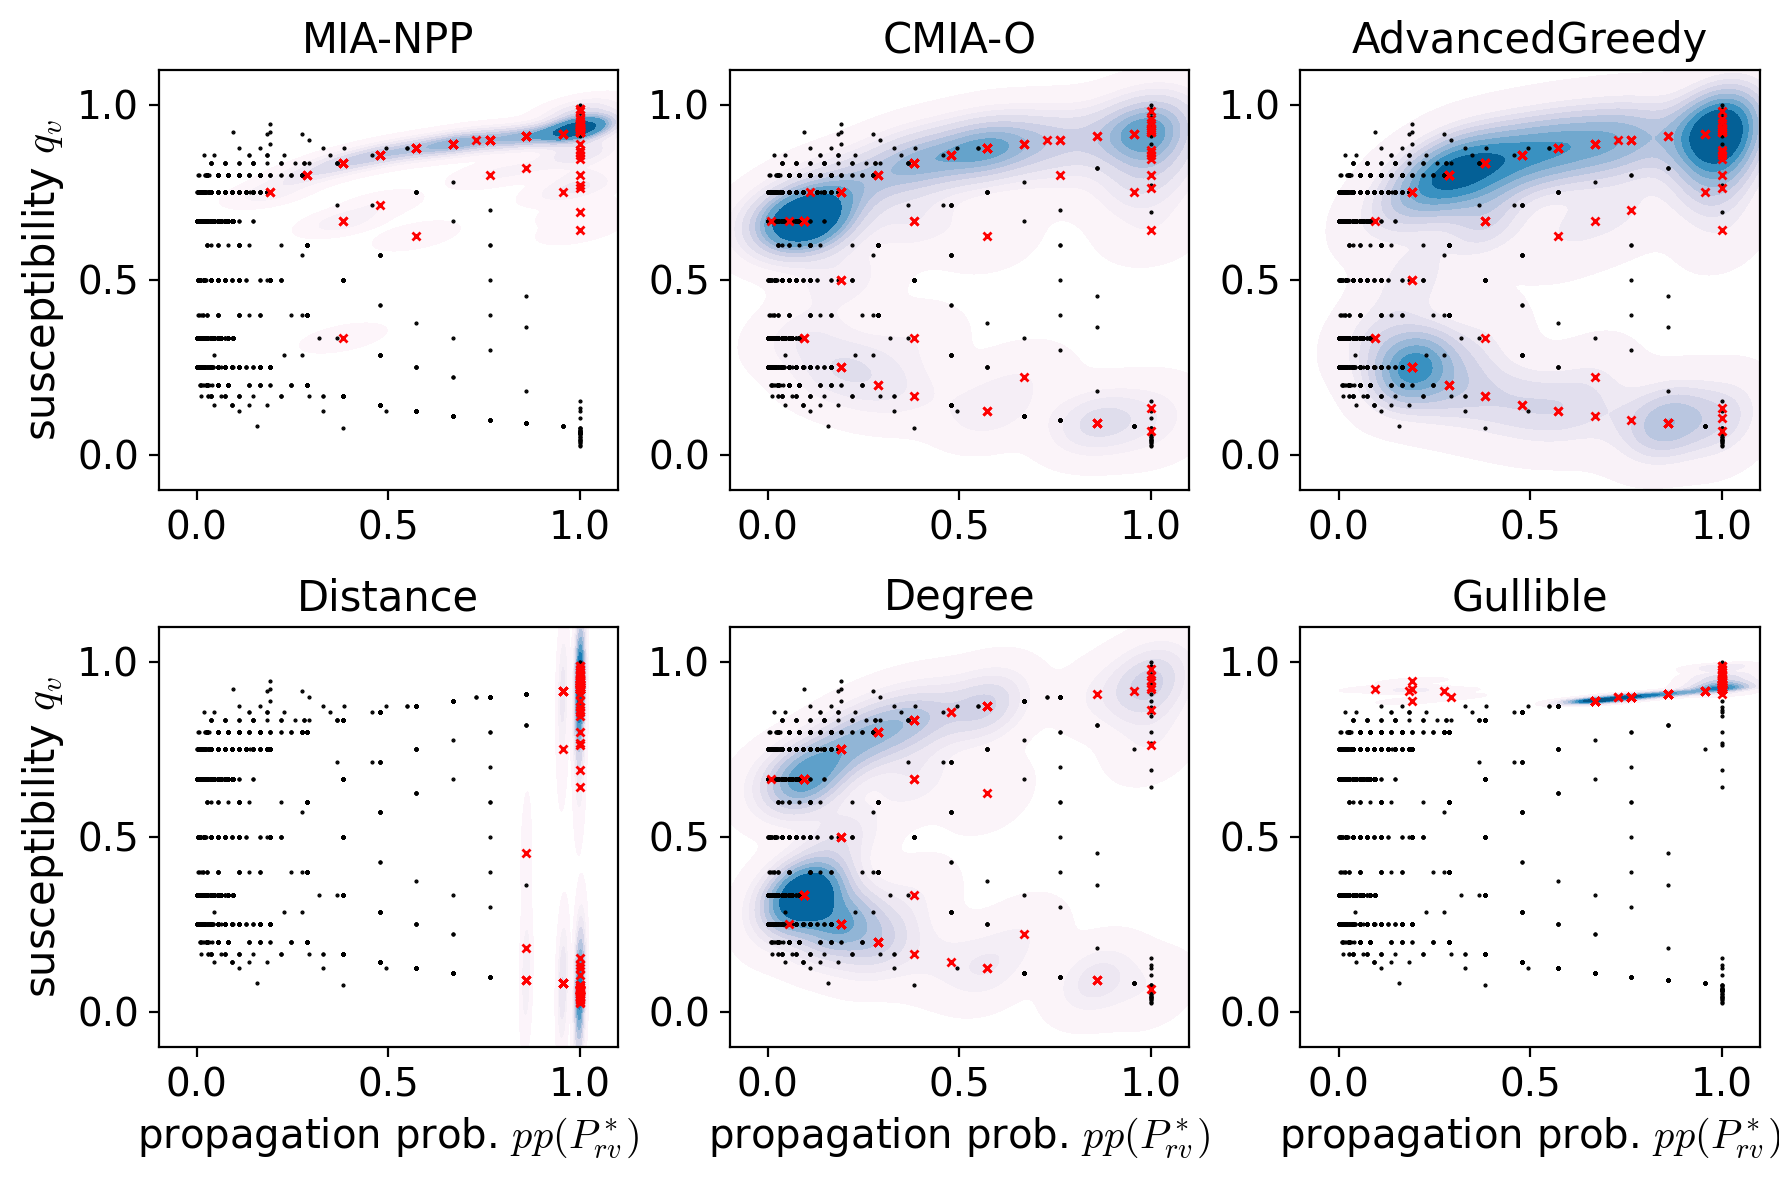

gossipcop


/var/folders/nw/gnp6yf4j2t36r0qchm4m9xg00000gn/T/ipykernel_25954/3674724335.py:47: UserWarning: KDE cannot be estimated (0 variance or perfect covariance). Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(x=x_X, y=y_X, cmap="PuBu", fill=True, bw_adjust=0.5, thresh=0.01)


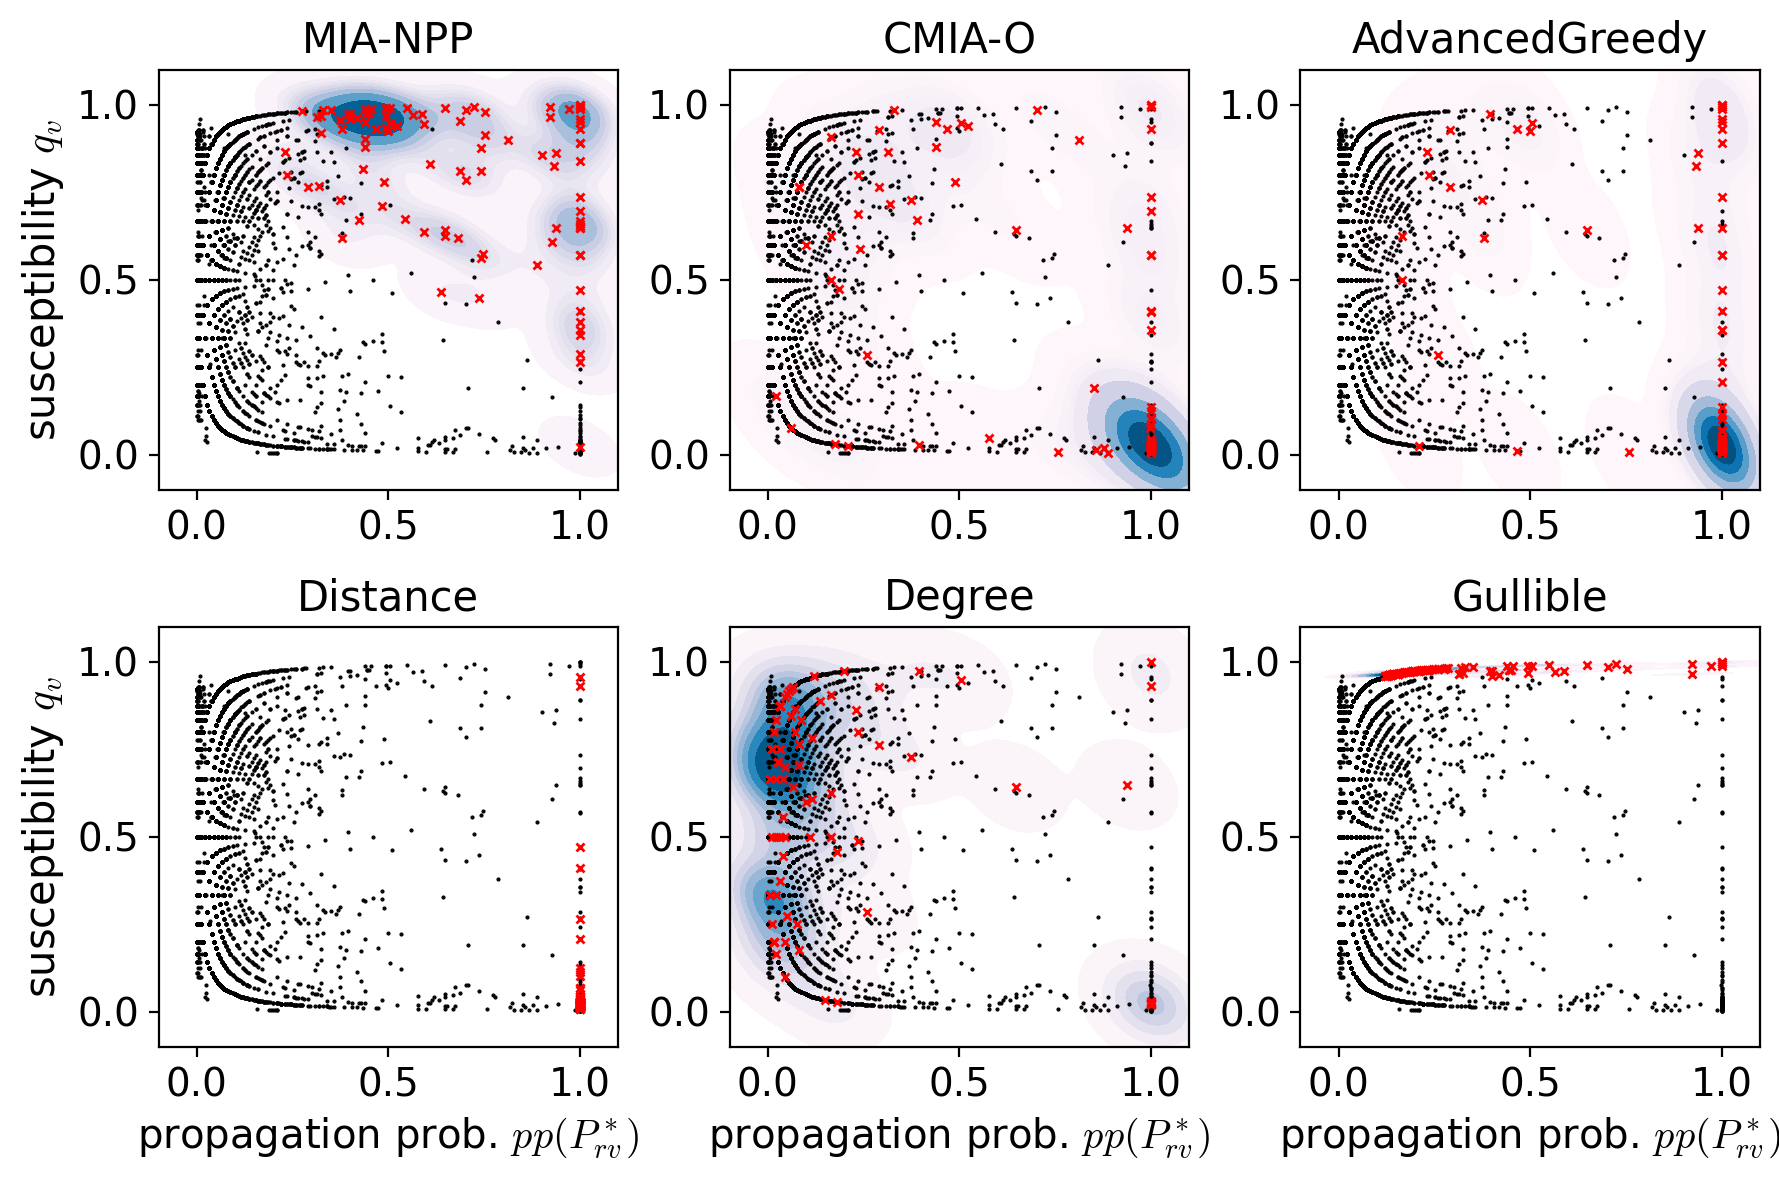

In [860]:
import networkx as nx
import load_real_graph
import seaborn as sns

def plot_target_nodes(graph_name, first_k):
    print(graph_name)
    graph = load_real_graph.FakeNewsNet_interaction_network(graph_name)
    q = {node: graph.nodes[node]['susceptibility'] for node in graph.nodes}
    dist, _ = nx.single_source_dijkstra(graph, source='root', weight='-logp')
    alg_names = ['MIA-NPP', 'CMIA-O', 'AdvancedGreedy', 'Distance', 'Degree', 'Gullible']
    
    x = []
    y = []
    for node in graph.nodes:
        if node in dist:
            pp = np.exp(-dist[node])
            x.append(pp)
            y.append(q[node])
    
    X_X = []
    Y_X = []
    for i in range(6):
        X_i = np.load(f'results_real/{graph_name}/{alg_names[i]}.npy', allow_pickle=True)
        x_X = []
        y_X = []
        for u in X_i[:first_k]:
            pp = np.exp(-dist[u])
            x_X.append(pp)
            y_X.append(q[u])
        X_X.append(x_X)
        Y_X.append(y_X)
    
    fig = plt.figure(figsize=(9,6), dpi=200)
    for i in range(6):
        x_X = X_X[i]
        y_X = Y_X[i]
        
        plt.subplot(2, 3, i+1)
        plt.title(f'{alg_names[i]}', fontsize=15)
        # plt.xlabel(r'distance $d(s, v)$', fontsize=12)
        if i > 2:
            plt.xlabel(r'propagation prob. $pp(P_{rv}^\ast)$', fontsize=14.5)
        if i == 0 or i == 3:
            plt.ylabel(r'susceptibility $q_v$', fontsize=15)
        plt.plot(x, y, 'k.', markersize=1)
        plt.plot(x_X, y_X, 'rx', markersize=3)
        sns.kdeplot(x=x_X, y=y_X, cmap="PuBu", fill=True, bw_adjust=0.5, thresh=0.01)
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.xticks([0.0, 0.5, 1.0], [0.0, 0.5, 1.0],fontsize=14)
        plt.yticks([0.0, 0.5, 1.0], [0.0, 0.5, 1.0],fontsize=14)
    plt.tight_layout()
    plt.show()

graph_name = 'politifact'
plot_target_nodes(graph_name, first_k=100)
graph_name = 'gossipcop'
plot_target_nodes(graph_name, first_k=100)

# Results under uncertain observations


ε_v ~ truncN(0.5, σ_ε^2) with σ_ε^2=0.1


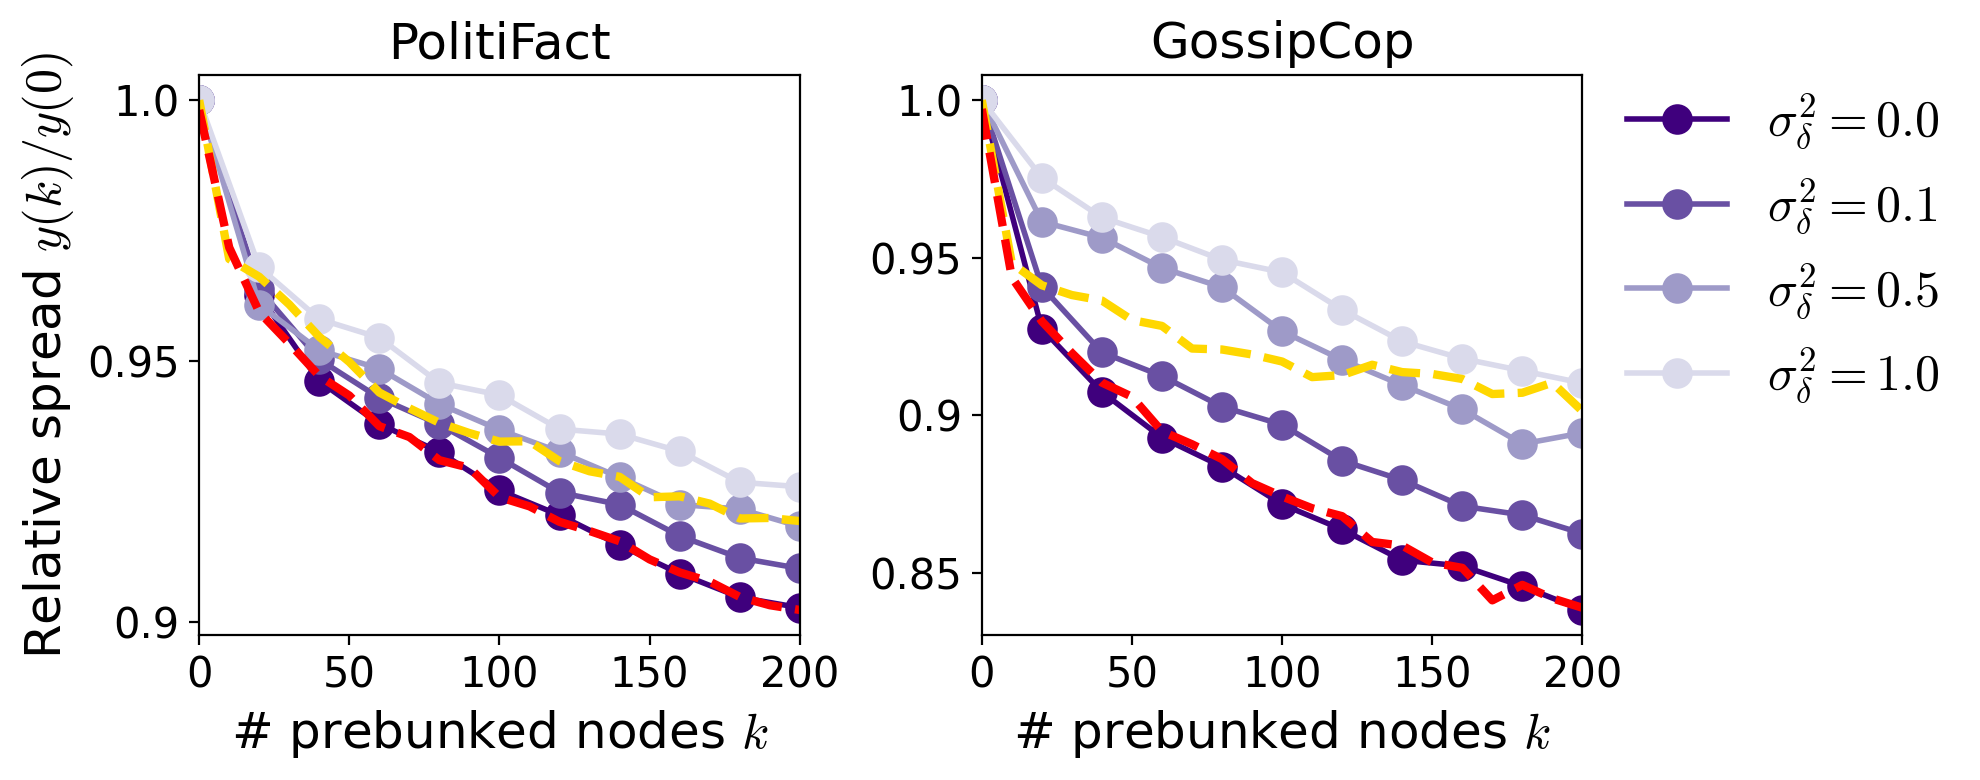

In [859]:

def plot_all_simulation_results_uncertain(graph_names, num_row, num_col, kmax, sig_eps_is_01):
    n = len(graph_names)
    
    step = kmax//20
    xaxis = np.arange(0, kmax + step, step)
    
    plt.rcParams["mathtext.fontset"] = 'cm'
    alg_names = ['MIA-NPP (sig_delta=00)', 'MIA-NPP (sig_delta=01)', 'MIA-NPP (sig_delta=05)', 'MIA-NPP (sig_delta=10)']
    alg_labels = [r'$\sigma_{\delta}^2=0.0$', r'$\sigma_{\delta}^2=0.1$', r'$\sigma_{\delta}^2=0.5$', r'$\sigma_{\delta}^2=1.0$']
    num_alg = len(alg_names)
    fmts = ['o-', '^-', 's-', 'v-', 'd-', '*-', 'x-']
    
    cmap = plt.get_cmap('Purples')
    colors = [cmap((a+1)/(num_alg)) for a in range(num_alg)][::-1]
    # colors = [cmap((a+1)/5) for a in range(5)][::-1]

    cmap_vi = plt.get_cmap('viridis')
    colors_vi = [cmap_vi((a+1)/(7)) for a in range(7)]
    
    fig = plt.figure(figsize=(10,4), dpi=200)
    for i in range(n):
        y0 = None
        plt.subplot(num_row, num_col, i+1)

        
        
        ###  MIA-NPP with different $\sigma_{\delta}$ ###
        for a in range(num_alg):
            alg_name = alg_names[a]
            path = 'results_uncertain/'+graph_names[i]+'/'+alg_name+'_sim_results.npy'
            if os.path.exists(path):
                y = np.load(path, allow_pickle=True) 
                # plt.plot(xaxis, (y/y[0]), 'o-', markersize=7, label=alg_labels[a], color=colors[a], lw=2)
                plt.plot(xaxis[::2], (y/y[0])[::2], 'o-', markersize=10, label=alg_labels[a], color=colors[a], lw=2)
            else:
                y = [np.nan for k in xaxis]
        
        ### Results of AdvancedGreedy and MIA-NPP under perfect observations (for comparison) ###
        if 'politifact' in graph_names[i]:
            gname = 'politifact'
        else:
            gname = 'gossipcop'
        if 'politifact' in graph_names[i]:
            gname = 'politifact'
        else:
            gname = 'gossipcop'
        y_AG = np.load(f'results_real/{gname}/AdvancedGreedy_sim_results.npy', allow_pickle=True)
        plt.plot(xaxis, y_AG/y_AG[0], '--', color='gold', lw=3)
        if sig_eps_is_01 == True:  # Results of MIA-NPP (sig_eps=0.5) is none.
            y_MIA = np.load(f'results_real/{gname}/MIA-NPP_sim_results.npy', allow_pickle=True)
            plt.plot(xaxis, y_MIA/y_AG[0], '--', color='r', lw=3)
        
        ymax = list(plt.ylim())[1]
        ymin = list(plt.ylim())[0]
        yscale = ymax - ymin
        plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=15)
        plt.xticks([0, 50, 100, 150, 200], [0, 50, 100, 150, 200], fontsize=15)
        plt.xlim((0, kmax))
        # plt.ylim((ymin - yscale * 0.45, ymax))
        # plt.ylim((0.8, 1.01))
        plt.ylim((ymin, ymax))
        if 'politifact' in graph_names[i]:
            # plt.title(f'PolitiFact ({title})', fontsize=15)
            plt.title(f'PolitiFact', fontsize=18)
        else:
            # plt.title(f'GossipCop ({title})', fontsize=15)
            plt.title(f'GossipCop', fontsize=18)
        if i == 0:
            # plt.ylabel('Residual misinformation', fontsize=18)
            plt.ylabel(r'Relative spread $y(k)/y(0)$', fontsize=18)
        plt.xlabel(r'# prebunked nodes $k$', fontsize=18)
        # plt.legend(fontsize=15, frameon=False, loc='lower left')
        # plt.legend(fontsize=15, frameon=False, loc='upper right')
        if i == 1:
            plt.legend(fontsize=18, frameon=False, bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.tight_layout()
    plt.show()

print('')
print('ε_v ~ truncN(0.5, σ_ε^2) with σ_ε^2=0.1')
graph_names = ['politifact (sig_eps=01)', 'gossipcop (sig_eps=01)']
plot_all_simulation_results_uncertain(graph_names, num_row=1, num_col=2, kmax=200, sig_eps_is_01=True)
print('')
# print('ε_v ~ truncN(0.5, σ_ε^2) with σ_ε^2=0.5')
# graph_names = ['politifact (sig_eps=05)', 'gossipcop (sig_eps=05)']
# plot_all_simulation_results_uncertain(graph_names, num_row=1, num_col=2, kmax=200, sig_eps_is_01=False)

# Comparison of Suppression Effects: Prebunking vs. Blocking vs. Clrification

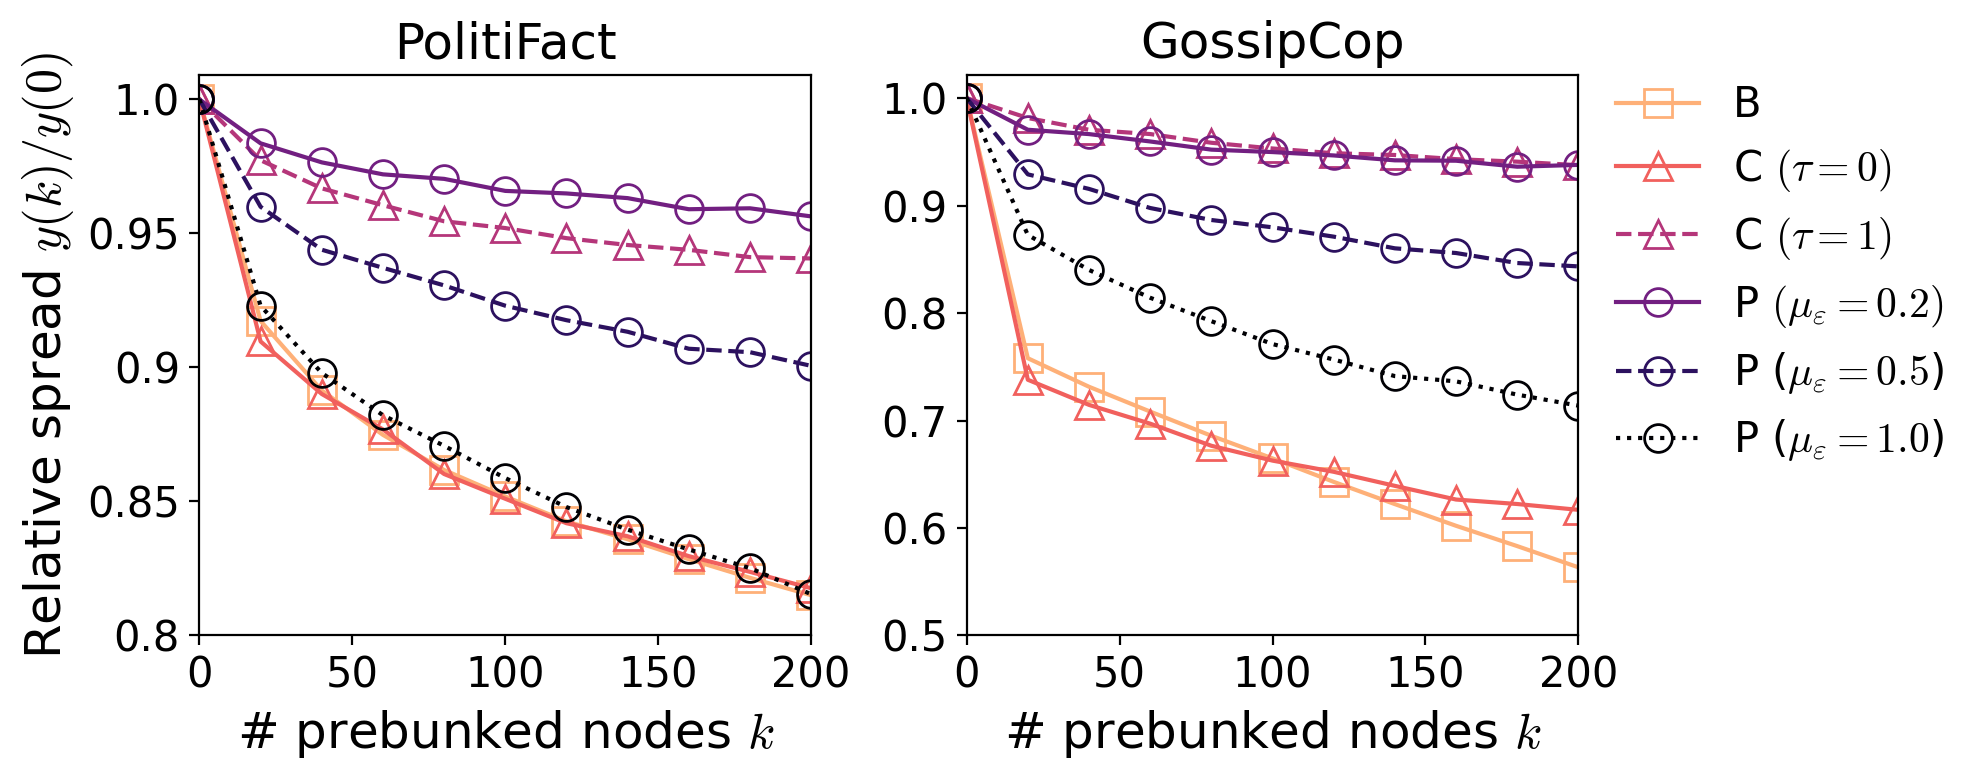

In [857]:

def plot_results_PBC_comparison(graph_names, num_row, num_col, kmax):
    n = 2
    step = kmax//20
    xaxis = np.arange(0, kmax + step, step)
    
    plt.rcParams["mathtext.fontset"] = 'cm'
    strategies = ['blocking', 'clarification', 'clarification_delay_1', 'prebunking02', 'prebunking05', 'prebunking10']
    # labels = ['blocking', 'clarification', r'prebunking ($\mu_{\varepsilon}=0.2$)', r'prebunking ($\mu_{\varepsilon}=0.5$)', r'prebunking ($\mu_{\varepsilon}=1.0$)']
    labels = ['B', r'C $(\tau=0)$', r'C $(\tau=1)$', r'P $(\mu_{\varepsilon}=0.2)$', r'P ($\mu_{\varepsilon}=0.5$)', r'P ($\mu_{\varepsilon}=1.0$)']
    fmts = ['s-', '^-', '^--', 'o-', 'o--', 'o:']
    cmap = plt.get_cmap('magma_r')
    colors = [cmap((a+1)/6) for a in range(6)]
    # colors = [colors0[0], colors0[1], colors0[1], colors0[2], colors0[2], colors0[2]]
    
    fig = plt.figure(figsize=(10,4), dpi=200)
    for i in range(n):
        plt.subplot(num_row, num_col, i+1)
        for a in range(6):
            strategy = strategies[a]
            path = f'results_compare_PBC/{graph_names[i]}/{strategy}_sim_results.npy'
            if os.path.exists(path):
                y = np.load(path, allow_pickle=True) 
                # plt.plot(xaxis, (y/y[0]), fmts[a], markersize=7, label=labels[a], color=colors[a], lw=1.5, markerfacecolor='None')
                plt.plot(xaxis[::2], (y/y[0])[::2], fmts[a], markersize=10, label=labels[a], color=colors[a], lw=1.5, markerfacecolor='None')
        ymax = list(plt.ylim())[1]
        ymin = list(plt.ylim())[0]
        yscale = ymax - ymin
        # yyy = np.arange(0, 101, 5) / 100
        plt.xticks([0, 50, 100, 150, 200], [0, 50, 100, 150, 200], fontsize=15)
        plt.xlim((0, kmax))
        # plt.ylim((ymin - yscale * 0.1, ymax))
        plt.ylim((ymin, ymax))
        if 'politifact' in graph_names[i]:
            plt.title(f'PolitiFact', fontsize=18)
            plt.yticks([0.8, 0.85, 0.9, 0.95, 1.0], [0.8, 0.85, 0.9, 0.95, 1.0], fontsize=15)
        else:
            plt.title(f'GossipCop', fontsize=18)
            plt.yticks([0.5, 0.6, 0.7, 0.8, 0.9, 1.0], [0.5, 0.6, 0.7, 0.8, 0.9, 1.0], fontsize=15)
        
        if i == 0:
            plt.ylabel(r'Relative spread $y(k)/y(0)$', fontsize=18)
            # plt.ylabel('CSR', fontsize=18)
        plt.xlabel(r'# prebunked nodes $k$', fontsize=18)
        # plt.legend(fontsize=13, frameon=False)
        if i == 1:
            plt.legend(fontsize=15, frameon=False, bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.tight_layout()
    plt.show()


graph_names = ['politifact', 'gossipcop']
plot_results_PBC_comparison(graph_names, num_row=1, num_col=2, kmax=200)

In [864]:
theta=0.0001
print(f'theta={int(theta * 10000):05d}')

theta=00001


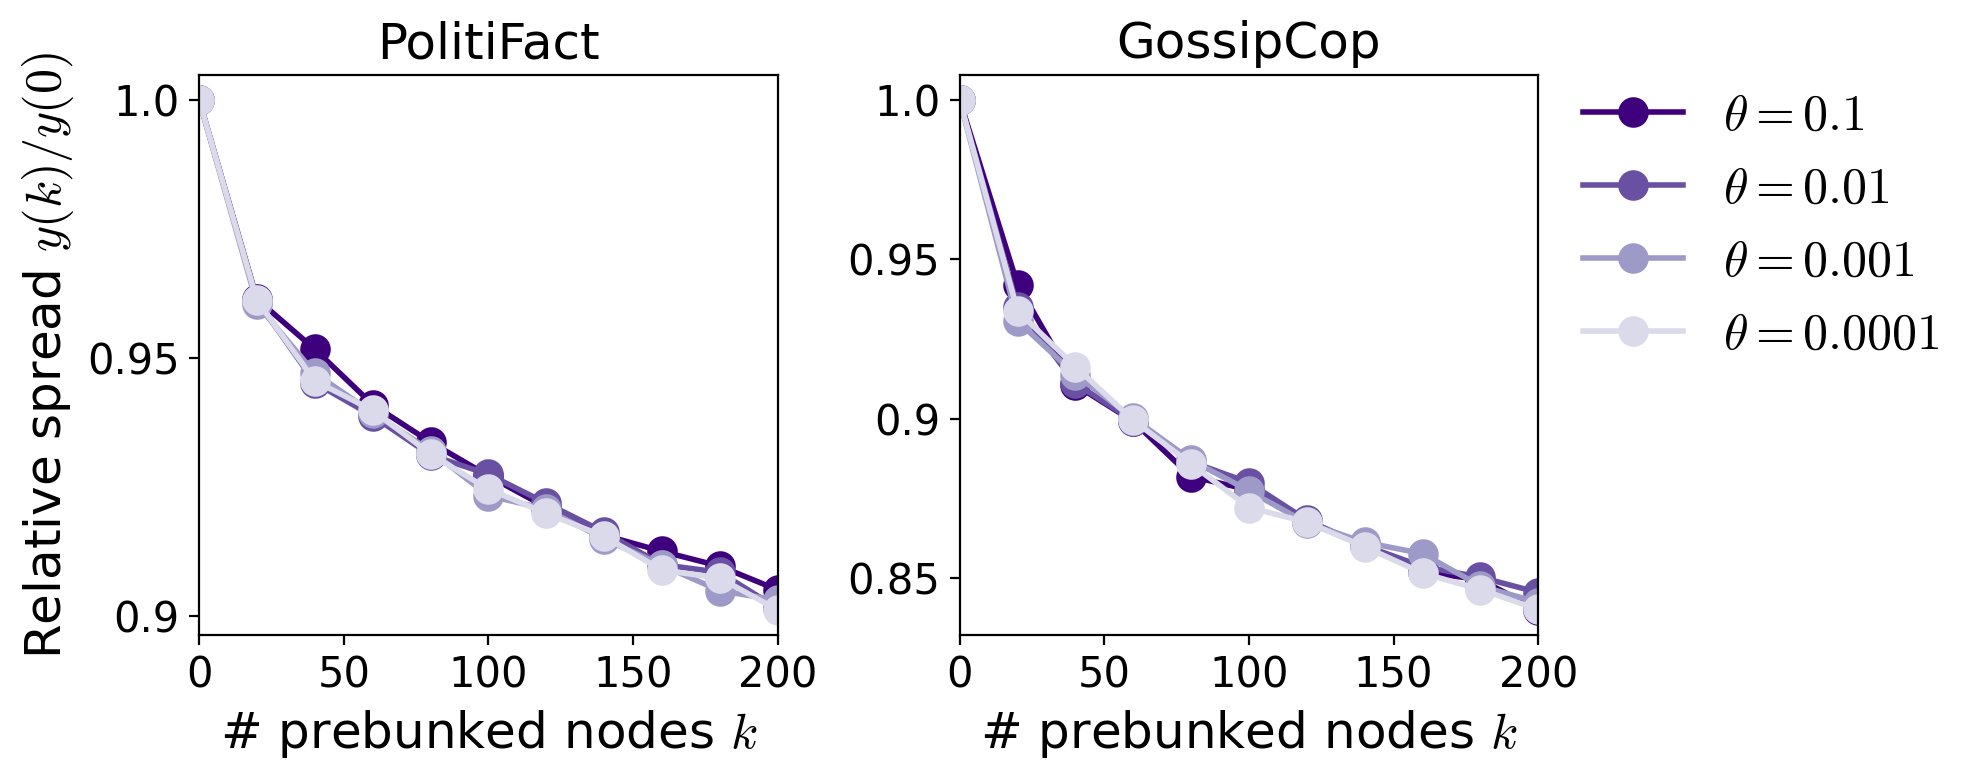

In [937]:

def plot_all_simulation_results_sensitivity(graph_names, num_row, num_col, kmax, sig_eps_is_01):
    n = len(graph_names)
    
    step = kmax//20
    xaxis = np.arange(0, kmax + step, step)
    
    plt.rcParams["mathtext.fontset"] = 'cm'
    alg_names = ['theta=01000', 'theta=00100', 'theta=00010', 'theta=00001']
    alg_labels = [r'$\theta=0.1$', r'$\theta=0.01$', r'$\theta=0.001$', r'$\theta=0.0001$']
    num_alg = len(alg_names)
    fmts = ['o-', '^-', 's-', 'v-', 'd-', '*-', 'x-']
    
    cmap = plt.get_cmap('Purples')
    colors = [cmap((a+1)/(num_alg)) for a in range(num_alg)][::-1]
    # colors = [cmap((a+1)/5) for a in range(5)][::-1]

    cmap_vi = plt.get_cmap('viridis')
    colors_vi = [cmap_vi((a+1)/(7)) for a in range(7)]
    
    fig = plt.figure(figsize=(10,4), dpi=200)
    for i in range(n):
        y0 = None
        plt.subplot(num_row, num_col, i+1)
        ###  MIA-NPP with different $\sigma_{\delta}$ ###
        for a in range(num_alg):
            alg_name = alg_names[a]
            path = 'results_sensitivity/'+graph_names[i]+'/'+alg_name+'_sim_results.npy'
            if os.path.exists(path):
                y = np.load(path, allow_pickle=True) 
                plt.plot(xaxis[::2], (y/y[0])[::2], 'o-', markersize=10, label=alg_labels[a], color=colors[a], lw=2)
            else:
                y = [np.nan for k in xaxis]
        
        ymax = list(plt.ylim())[1]
        ymin = list(plt.ylim())[0]
        yscale = ymax - ymin
        plt.yticks([0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], [0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0], fontsize=15)
        plt.xticks([0, 50, 100, 150, 200], [0, 50, 100, 150, 200], fontsize=15)
        plt.xlim((0, kmax))
        # plt.ylim((ymin - yscale * 0.45, ymax))
        # plt.ylim((0.8, 1.01))
        plt.ylim((ymin, ymax))
        if 'politifact' in graph_names[i]:
            # plt.title(f'PolitiFact ({title})', fontsize=15)
            plt.title(f'PolitiFact', fontsize=18)
        else:
            # plt.title(f'GossipCop ({title})', fontsize=15)
            plt.title(f'GossipCop', fontsize=18)
        if i == 0:
            # plt.ylabel('Residual misinformation', fontsize=18)
            plt.ylabel(r'Relative spread $y(k)/y(0)$', fontsize=18)
        plt.xlabel(r'# prebunked nodes $k$', fontsize=18)
        # plt.legend(fontsize=15, frameon=False, loc='lower left')
        # plt.legend(fontsize=15, frameon=False, loc='upper right')
        if i == 1:
            plt.legend(fontsize=18, frameon=False, bbox_to_anchor=(1.0, 1.05), loc='upper left')
    plt.tight_layout()
    plt.show()

print('')
graph_names = ['politifact', 'gossipcop']
plot_all_simulation_results_sensitivity(graph_names, num_row=1, num_col=2, kmax=200, sig_eps_is_01=True)
print('')
# print('ε_v ~ truncN(0.5, σ_ε^2) with σ_ε^2=0.5')
# graph_names = ['politifact (sig_eps=05)', 'gossipcop (sig_eps=05)']
# plot_all_simulation_results_uncertain(graph_names, num_row=1, num_col=2, kmax=200, sig_eps_is_01=False)

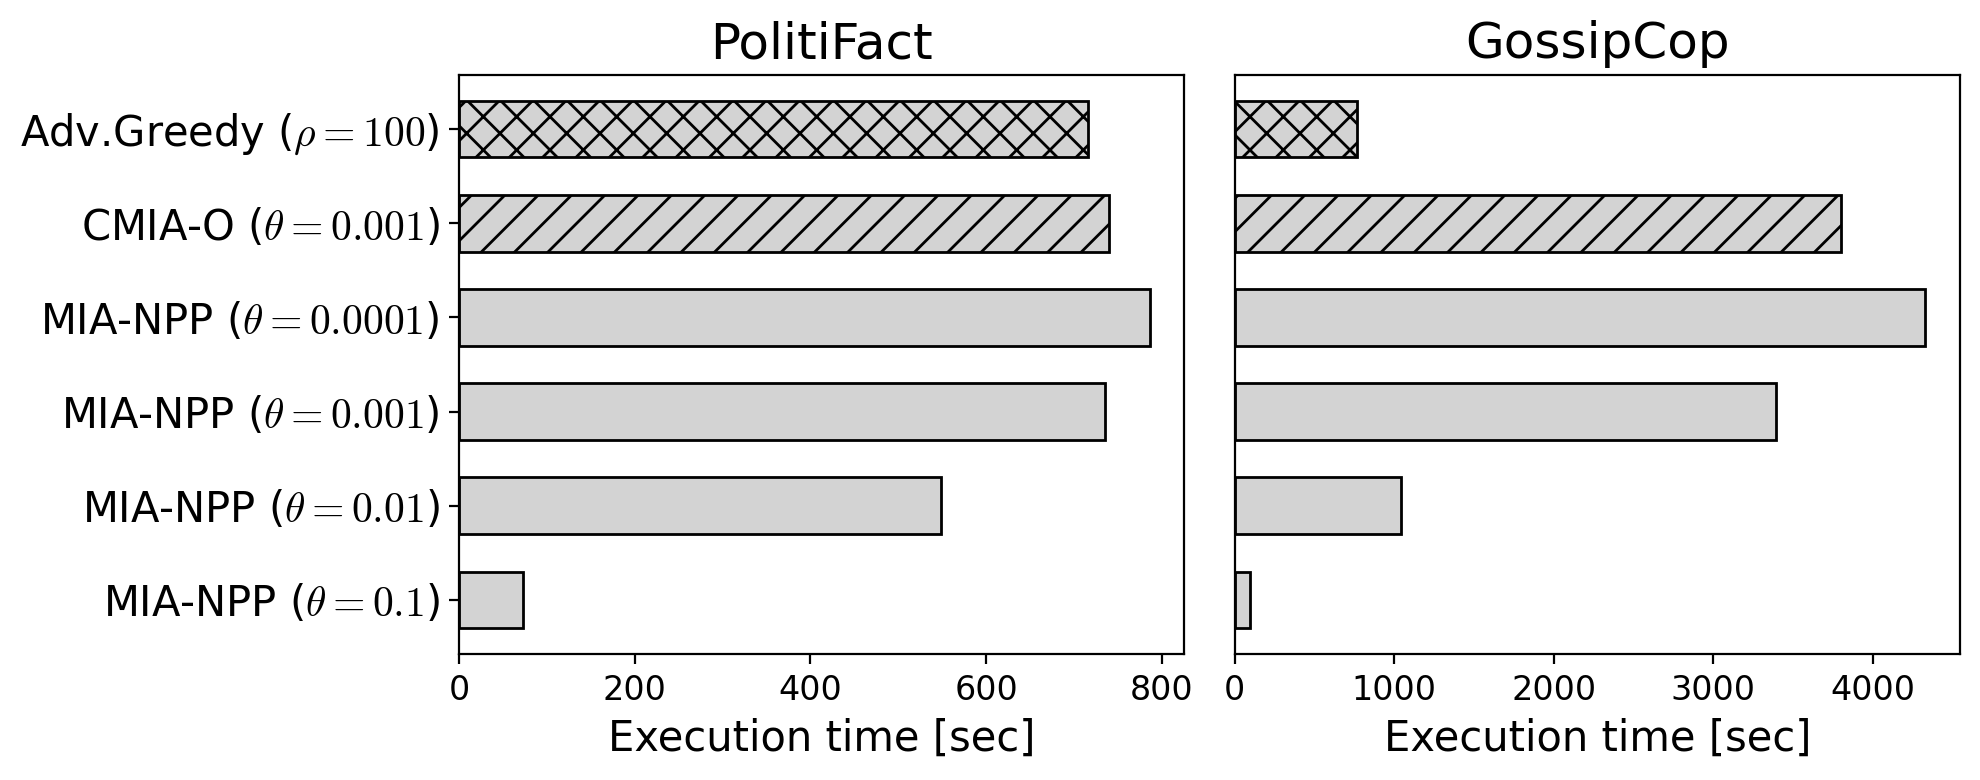

In [943]:
import matplotlib.pyplot as plt
import numpy as np

# データの準備
alg_labels = [r'MIA-NPP ($\theta=0.1$)', r'MIA-NPP ($\theta=0.01$)', r'MIA-NPP ($\theta=0.001$)', r'MIA-NPP ($\theta=0.0001$)', r'CMIA-O ($\theta=0.001$)', r'Adv.Greedy ($\rho=100$)']
alg_labels2 = ['a', 'b', 'c', 'd', 'e', 'f']
execution_times_pol = [72.63, 548.88, 735.61, 786.32, 739.40, 715.66]
execution_times_gos = [94.1, 1044.52, 3392.34, 4329.45, 3797.8, 766.38]

x = np.arange(len(alg_labels))  # x軸の位置
width = 0.6  # バーの幅

hatches = ['', '', '', '', '/'*2, 'x'*2]
cmap = plt.get_cmap('Purples')
colors_pu = [cmap((a+1)/4) for a in range(4)][::-1]
cmap_vi = plt.get_cmap('viridis')
colors_vi = [cmap_vi((a+1)/(7)) for a in range(7)]
colors = colors_pu + [colors_vi[1]] + [colors_vi[2]]

fig = plt.figure(figsize=(10,4), dpi=200)

plt.subplot(121)
bars = plt.barh(alg_labels, execution_times_pol, width, edgecolor='black', color='lightgray')
plt.title('PolitiFact', fontsize=18)
plt.xlabel('Execution time [sec]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.subplot(122)
bars = plt.barh(alg_labels2, execution_times_gos, width, edgecolor='black', color='lightgray')
plt.yticks([])
plt.xticks(fontsize=12)
plt.title('GossipCop', fontsize=18)
plt.xlabel('Execution time [sec]', fontsize=15)
for bar, hatch in zip(bars, hatches):
    bar.set_hatch(hatch)
plt.tight_layout()
plt.show()